In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

import ast

pd.options.mode.chained_assignment = None

df = pd.read_csv('movies_metadata.csv', skiprows=[19730, 19731, 29503, 29504, 35587, 35588], usecols=['id', 'original_title', 'original_language', 'genres', 'production_companies', 'production_countries', 'release_date', 'runtime', 'revenue','vote_average'])

df = df.drop_duplicates(subset=['id'], ignore_index=True)

df['genres'] = df['genres'].apply(lambda genres_list: [genres['name'] for genres in ast.literal_eval(genres_list)])

df['production_companies'] = df['production_companies'].apply(lambda companies_list: [companies['name'] for companies in ast.literal_eval(companies_list)])

df['production_countries'] = df['production_countries'].apply(lambda countries_list: [countries['iso_3166_1'] for countries in ast.literal_eval(countries_list)])

df

,genres,id,original_language,original_title,production_companies,production_countries,release_date,revenue,runtime,vote_average
0,"[Animation, Comedy, Family]",862,en,Toy Story,[Pixar Animation Studios],[US],1995-10-30,373554033,81.0,7.7
1,"[Adventure, Fantasy, Family]",8844,en,Jumanji,"[TriStar Pictures, Teitler Film, Interscope Co...",[US],1995-12-15,262797249,104.0,6.9
2,"[Romance, Comedy]",15602,en,Grumpier Old Men,"[Warner Bros., Lancaster Gate]",[US],1995-12-22,0,101.0,6.5
3,"[Comedy, Drama, Romance]",31357,en,Waiting to Exhale,[Twentieth Century Fox Film Corporation],[US],1995-12-22,81452156,127.0,6.1
4,[Comedy],11862,en,Father of the Bride Part II,"[Sandollar Productions, Touchstone Pictures]",[US],1995-02-10,76578911,106.0,5.7
...,...,...,...,...,...,...,...,...,...,...
45425,"[Drama, Family]",439050,fa,رگ خواب,[],[IR],NaN,0,90.0,4.0
45426,[Drama],111109,tl,Siglo ng Pagluluwal,[Sine Olivia],[PH],2011-11-17,0,360.0,9.0
45427,"[Action, Drama, Thriller]",67758,en,Betrayal,[American World Pictures],[US],2003-08-01,0,90.0,3.8
45428,[],227506,en,Satana likuyushchiy,[Yermoliev],[RU],1917-10-21,0,87.0,0.0


In [2]:
df.drop(df[df['vote_average'] == 0.0].index, inplace=True)
df

,genres,id,original_language,original_title,production_companies,production_countries,release_date,revenue,runtime,vote_average
0,"[Animation, Comedy, Family]",862,en,Toy Story,[Pixar Animation Studios],[US],1995-10-30,373554033,81.0,7.7
1,"[Adventure, Fantasy, Family]",8844,en,Jumanji,"[TriStar Pictures, Teitler Film, Interscope Co...",[US],1995-12-15,262797249,104.0,6.9
2,"[Romance, Comedy]",15602,en,Grumpier Old Men,"[Warner Bros., Lancaster Gate]",[US],1995-12-22,0,101.0,6.5
3,"[Comedy, Drama, Romance]",31357,en,Waiting to Exhale,[Twentieth Century Fox Film Corporation],[US],1995-12-22,81452156,127.0,6.1
4,[Comedy],11862,en,Father of the Bride Part II,"[Sandollar Productions, Touchstone Pictures]",[US],1995-02-10,76578911,106.0,5.7
...,...,...,...,...,...,...,...,...,...,...
45423,[Science Fiction],222848,en,Caged Heat 3000,[Concorde-New Horizons],[US],1995-01-01,0,85.0,3.5
45424,"[Drama, Action, Romance]",30840,en,Robin Hood,"[Westdeutscher Rundfunk (WDR), Working Title F...","[CA, DE, GB, US]",1991-05-13,0,104.0,5.7
45425,"[Drama, Family]",439050,fa,رگ خواب,[],[IR],NaN,0,90.0,4.0
45426,[Drama],111109,tl,Siglo ng Pagluluwal,[Sine Olivia],[PH],2011-11-17,0,360.0,9.0


array([<AxesSubplot:title={'center':'0'}>], dtype=object)

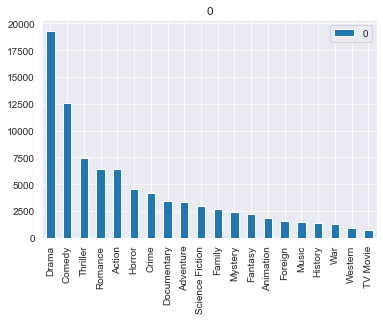

In [3]:
genres = []
for i in df['genres']:
    for j in i:
        genres.append(j)
pd.DataFrame(genres).apply(pd.value_counts).plot(kind='bar', subplots=True)

array([<AxesSubplot:title={'center':'0'}>], dtype=object)

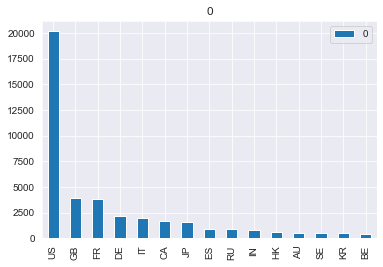

In [4]:
production_countries = []
for i in df['production_countries']:
    for j in i:
        production_countries.append(j)
pd.DataFrame(production_countries).apply(pd.value_counts)[:15].plot(kind='bar', subplots=True)

array([<AxesSubplot:title={'center':'0'}>], dtype=object)

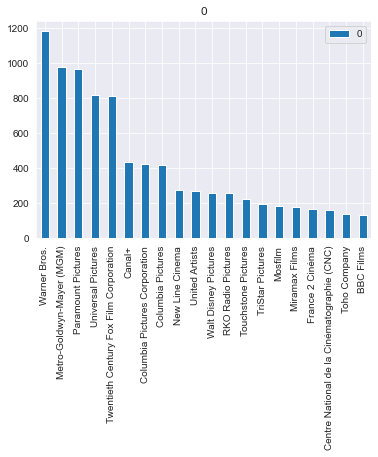

In [5]:
production_companies = []
for i in df['production_companies']:
    for j in i:
        production_companies.append(j)
pd.DataFrame(production_companies).apply(pd.value_counts)[:20].plot(kind='bar', subplots=True)

In [6]:
df['release_date'] = df['release_date'].apply(lambda date: str(date)[:4])

df.rename(columns={'release_date': 'release_year'}, inplace=True)

<AxesSubplot:xlabel='release_year'>

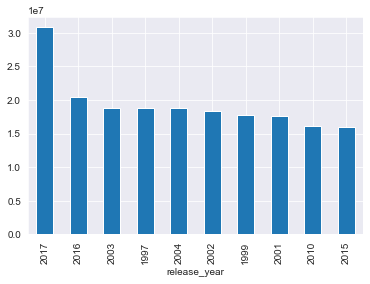

In [7]:
yearly_revenues = df.groupby('release_year')['revenue'].mean().sort_values(ascending=False)
yearly_revenues.apply(lambda x: str(round(x / 1_000_000, 2)) + 'm')

yearly_revenues
yearly_revenues[:10].plot(kind='bar')
# sns.barplot(x='release_year', y='revenue', data=yearly_revenues)
# plt.title('Revenue by year')
# plt.show()